# Gradient Computation with Mojo

This notebook demonstrates automatic differentiation and gradient computation using the mojo-unnet library.

## Setup

First, import the mojo.notebook module to enable Mojo code execution:

In [1]:
import sys
sys.path.insert(0, "..")
import utils.notebook

## Creating Nodes

Let's create a bunch of nodes that store some values. Each node represents a value in our computation graph:

In [2]:
%%mojo

from unnet import Node, Op

fn main():
    var a = Node(2.0, "a")
    var b = Node(3.0, "b")
    var c = Node(1.5, "c")
    
    print("Node a:", a)
    print("Node b:", b)
    print("Node c:", c)

Node a: [a|2.0|0.0]
Node b: [b|3.0|0.0]
Node c: [c|1.5|0.0]



## Performing Mathematical Operations

Now let's perform some mathematical operations to get a final result node.
These operations build a computation graph automatically:

In [3]:
%%mojo

from unnet import Node, Op

fn main():
    var a = Node(2.0, "a")
    var b = Node(3.0, "b")
    var c = Node(1.5, "c")
    
    # Perform operations: d = a * b, then e = d + c + a
    var d = a * b
    d.name = "d"
    var e = d + c + a
    e.name = "e"
    
    print("Expression: a * b + c + a")
    print("Result (e):", e)
    print("Value: 2.0 * 3.0 + 1.5 + 2.0 =", e.value)

Expression: a * b + c + a
Result (e): [e|9.5|0.0]
Value: 2.0 * 3.0 + 1.5 + 2.0 = 9.5



## Forward Propagation

The computation we just performed is analogous to a forward pass in a neural network.
Values flow through the computation graph from inputs (a, b, c) to the output (e).

## Backpropagation

Now let's calculate the gradients of all nodes by executing the backpropagation method.
This computes how much each input affects the final output:

In [9]:
%%mojo

from unnet import Node, Op

fn main():
    var a = Node(2.0, "a")
    var b = Node(3.0, "b")
    var c = Node(1.5, "c")
    
    var d = a * b
    d.name = "d"
    var e = d + c + a
    e.name = "e"
    
    # Perform backpropagation
    e.backward()
    
    print("After calling e.backward():")
    print("e.get_grad() =", e.get_grad())
    print("d.get_grad() =", d.get_grad())
    print("c.get_grad() =", c.get_grad())
    print("b.get_grad() =", b.get_grad())
    print("a.get_grad() =", a.get_grad())
    print("")

After calling e.backward():
e.get_grad() = 1.0
d.get_grad() = 1.0
c.get_grad() = 1.0
b.get_grad() = 2.0
a.get_grad() = 4.0




## Understanding Gradients

In a fully implemented backpropagation system, the gradients would tell us:

- `e.grad = 1.0`: The output's gradient with respect to itself
- `d.grad = 1.0`: How much e changes when d changes (∂e/∂d)
- `c.grad = 1.0`: How much e changes when c changes (∂e/∂c)
- `b.grad = 2.0`: How much e changes when b changes (∂e/∂b)
- `a.grad = 4.0`: How much e changes when a changes (∂e/∂a)

Note: `a` appears twice in the expression (in `d = a * b` and in the final addition),
so its gradient accumulates contributions from both paths.

## Other Operations

The Node struct supports various operations:

In [10]:
%%mojo

from unnet import Node, Op

fn main():
    var x = Node(2.0, "x")
    var y = Node(3.0, "y")
    
    # Addition
    var add_result = x + y
    print("x + y =", add_result.value)
    
    # Subtraction
    var sub_result = x - y
    print("x - y =", sub_result.value)
    
    # Multiplication
    var mul_result = x * y
    print("x * y =", mul_result.value)
    
    # Power
    var pow_result = x ** 3.0
    print("x ** 3 =", pow_result.value)
    
    # Tanh activation
    var tanh_result = x.tanh()
    print("tanh(x) =", tanh_result.value)

x + y = 5.0
x - y = -1.0
x * y = 6.0
x ** 3 = 8.0
tanh(x) = 0.964027560157197



## Visualizing the Computation Graph

We can visualize the directed graph of operations using the `draw` utility function.
This creates a graphviz visualization showing nodes, operations, and their connections:

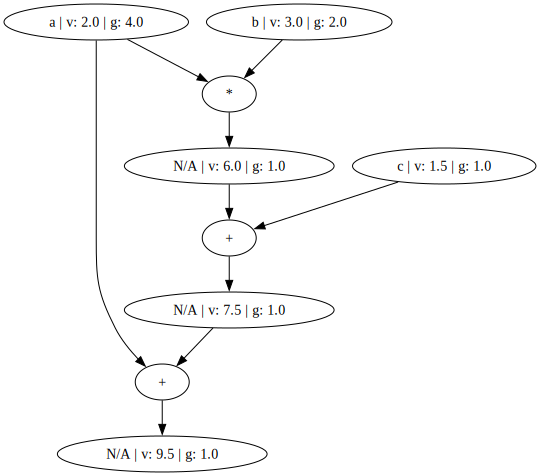

In [12]:
%%mojo get_graph
from python import Python, PythonObject
from unnet import Node, Op
from unnet.utils import draw

fn get_graph() raises -> PythonObject:
    var a = Node(2.0, "a")
    var b = Node(3.0, "b")
    var c = Node(1.5, "c")
    
    var d = a * b
    d.name = "d"
    var e = d + c + a
    e.name = "e"

    e.backward()
    
    # Draw the computation graph
    return draw(e)

## Exploring the Graph Structure

We can also programmatically explore the structure using the `walk` utility:

In [14]:
%%mojo

from unnet import Node, Op 
from unnet.utils import walk

fn main():
    var a = Node(2.0, "a")
    var b = Node(3.0, "b")
    var c = Node(1.5, "c")
    
    var d = a * b
    d.name = "d"
    var e = d + c + a
    e.name = "e"
    e.backward()
    
    # Walk the computation graph
    ref nodes, edges = walk(e)
    
    print("Nodes in the graph:")
    for i in range(len(nodes)):
        var node = nodes[i]
        print(node)
    
    print("\nEdges in the graph (parent -> child):")
    for i in range(len(edges)):
        var edge = edges[i]
        print("  ", edge[0], "->", edge[1])

Nodes in the graph:
[N/A|9.5|1.0]
[a|2.0|4.0]
[N/A|7.5|1.0]
[c|1.5|1.0]
[N/A|6.0|1.0]
[b|3.0|2.0]

Edges in the graph (parent -> child):
   [N/A|7.5|1.0] -> [N/A|9.5|1.0]
   [a|2.0|4.0] -> [N/A|9.5|1.0]
   [N/A|6.0|1.0] -> [N/A|7.5|1.0]
   [c|1.5|1.0] -> [N/A|7.5|1.0]
   [a|2.0|4.0] -> [N/A|6.0|1.0]
   [b|3.0|2.0] -> [N/A|6.0|1.0]



## Neural Network Connection

This automatic differentiation system is the foundation of neural networks:

1. **Forward Pass**: Compute output from inputs (what we did with `a * b + c + a`)
2. **Backward Pass**: Compute gradients to know how to adjust weights
3. **Update network params**: Use gradients to improve the network (gradient descent)

Each operation (addition, multiplication, etc.) knows how to compute its gradient,
allowing complex neural networks to be trained efficiently through backpropagation.